https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0

https://wiki.openstreetmap.org/wiki/Map_features

https://cienciadedatos.net/documentos/py40-puntos-interes-openstreetmap-python

https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL#By_tag_.28has-kv.29

https://github.com/njanakiev/openstreetmap-heatmap

https://pygis.io/docs/d_access_osm.html

https://networkx.org/documentation/stable/

https://autogis-site.readthedocs.io/en/latest/

https://www.youtube.com/watch?v=g65MkpcjEpM&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N&index=3

https://github.com/gboeing/osmnx-examples/blob/main/notebooks/00-osmnx-features-demo.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import networkx as nx
import osmnx as ox
# import json

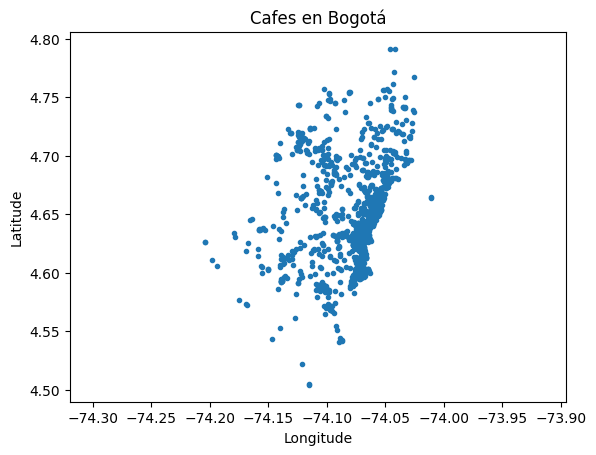

In [8]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["name"="Bogotá"];
(
  node["amenity"="cafe"](area);
  way["amenity"="cafe"](area);
  rel["amenity"="cafe"](area);
);
out center;
way(area)["name"="Bogotá"];
out geom;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], '.')
plt.title('Cafes en Bogotá')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [9]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="CO"][admin_level=2];
(node["amenity"="cafe"](area);
 way["amenity"="cafe"](area);
 rel["amenity"="cafe"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

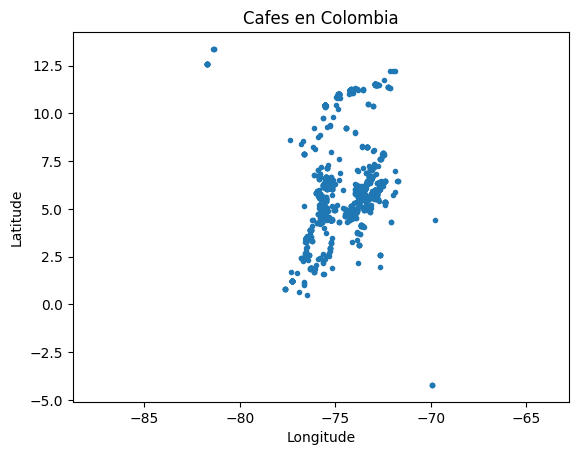

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], '.')
plt.title('Cafes en Colombia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [11]:
centro_madrid = [40.41678750299365, -3.7037881869889424]
centro_bogota = [4.6097, -74.0817]

In [21]:
# Lectura datos osm
#import osmium as osm

# Tratamiento de datos
import pandas as pd
import numpy as np
import itertools

# Tratamiento de datos geográficos y mapas
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.distance import distance
from shapely.geometry import Polygon
import folium
from folium.plugins import HeatMap
from branca.element import Figure

In [22]:
fig = Figure(width=600, height=400)
mapa = folium.Map(location=centro_bogota, zoom_start=11)
fig.add_child(mapa)

In [25]:
import osmnx as ox
import geopandas as gpd

<Axes: >

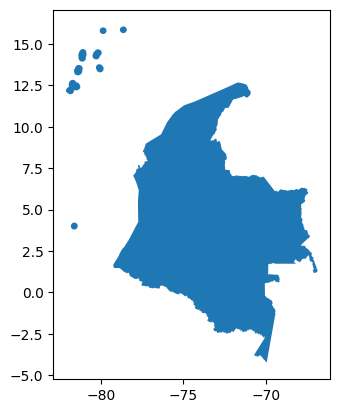

In [26]:
# Specify the name that is used to seach for the data
place_name = "Colombia"
area = ox.geocode_to_gdf(place_name)
area.plot()

/var/folders/f7/v5vtvxm14dq4hjr_6y4ltg680000gn/T/ipykernel_49722/1268086589.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_place(place_name, tags)


<Axes: >

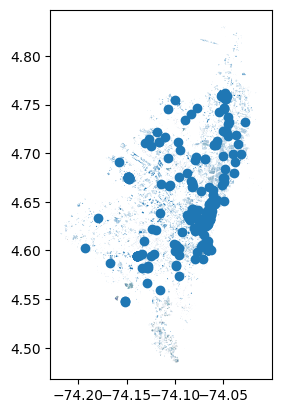

In [67]:
# Specify the name that is used to seach for the data
place_name = "Bogotá, Bogotá, Distrito Capital, RAP (Especial) Central, Colombia"
area = ox.geocode_to_gdf(place_name)

# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.geometries_from_place(place_name, tags)
#buildings.head()

# Plot footprints 
buildings.plot()

## ***Networks***

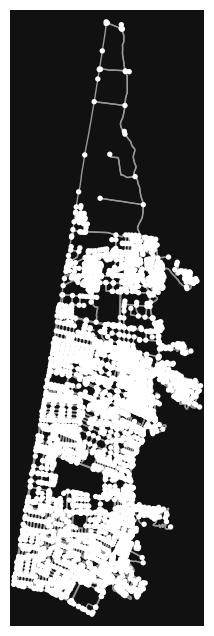

In [8]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Localidad Usaquén, Bogotá, Bogotá, Distrito Capital, RAP (Especial) Central, Colombia", network_type="drive")
fig, ax = ox.plot_graph(G)

In [9]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.utils_graph.get_digraph(G)

/var/folders/f7/v5vtvxm14dq4hjr_6y4ltg680000gn/T/ipykernel_50774/999730135.py:2: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  M = ox.utils_graph.get_undirected(G)
/var/folders/f7/v5vtvxm14dq4hjr_6y4ltg680000gn/T/ipykernel_50774/999730135.py:5: FutureWarning: The `get_digraph` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_digraph` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  D = ox.utils_graph.get_digraph(G)


In [10]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
254347526,4.697780,-74.030848,3,NaN,POINT (-74.03085 4.69778)
254347527,4.697348,-74.031185,3,NaN,POINT (-74.03119 4.69735)
254347540,4.687908,-74.034982,3,traffic_signals,POINT (-74.03498 4.68791)
254347543,4.685141,-74.035708,4,traffic_signals,POINT (-74.03571 4.68514)
254530409,4.696943,-74.033164,3,NaN,POINT (-74.03316 4.69694)


In [11]:
gdf_edges.head()


osmid  oneway lanes               name  \
u         v          key                                               
254347526 254347527  0     89438994    True     3  Avenida Carrera 7   
254347527 475150473  0     89438994    True     3  Avenida Carrera 7   
          475150478  0     39637704   False     2         Calle 120A   
254347540 5935325521 0    628655300    True     2  Avenida Carrera 7   
254347543 476455721  0     89480449    True     2          Calle 106   

                              highway reversed   length  \
u         v          key                                  
254347526 254347527  0        primary    False   60.871   
254347527 475150473  0        primary    False   65.912   
          475150478  0    residential    False  207.334   
254347540 5935325521 0        primary    False   11.002   
254347543 476455721  0      secondary    False   11.162   

                                                                   geometry  \
u         v          key                                                      
254347526 254347527  0    LINESTRING (-74.03085 4.69778, -74.03093 4.697...   
254347527 475150473  0    LINESTRING (-74.03119 4.69735, -74.03151 4.69685)   
          475150478  0    LINESTRING (-74.03119 4.69735, -74.03125 4.697...   
254347540 5935325521 0    LINESTRING (-74.03498 4.68791, -74.03500 4.68781)   
254347543 476455721  0    LINESTRING (-74.03571 4.68514, -74.03568 4.685...   

                         maxspeed access bridge  ref tunnel junction  
u         v          key                                              
254347526 254347527  0        NaN    NaN    NaN  NaN    NaN      NaN  
254347527 475150473  0        NaN    NaN    NaN  NaN    NaN      NaN  
          475150478  0         30    NaN    NaN  NaN    NaN      NaN  
254347540 5935325521 0        NaN    NaN    NaN  NaN    NaN      NaN  
254347543 476455721  0        NaN    NaN    NaN  NaN    NaN      NaN

In [12]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

In [13]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

45909907.42792246

In [14]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 3726,
 'm': 8495,
 'k_avg': 4.559849704777241,
 'edge_length_total': 796208.453999998,
 'edge_length_avg': 93.72671618599153,
 'streets_per_node_avg': np.float64(2.8373590982286636),
 'streets_per_node_counts': {0: 0, 1: 626, 2: 8, 3: 2454, 4: 625, 5: 10, 6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.16800858829844337,
  2: 0.0021470746108427268,
  3: 0.6586151368760065,
  4: 0.16774020397208803,
  5: 0.0026838432635534087,
  6: 0.0008051529790660225},
 'intersection_count': np.int64(3100),
 'street_length_total': 502575.7520000009,
 'street_segment_count': 5266,
 'street_length_avg': 95.4378564375239,
 'circuity_avg': np.float64(1.0491442557578632),
 'self_loop_proportion': 0.00018989745537409798,
 'clean_intersection_count': 2225,
 'node_density_km': 81.15895258228821,
 'intersection_density_km': np.float64(67.52355153115766),
 'edge_density_km': 17342.84599135879,
 'street_density_km': 10946.999899510443,
 'clean_intersection_density_km': 48.464484566718}

In [15]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

In [16]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

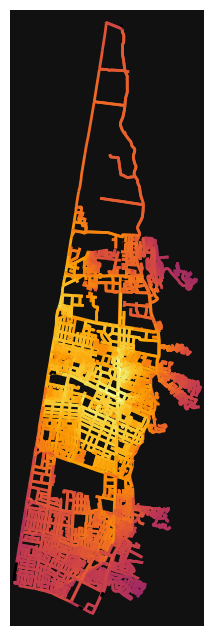

In [17]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [42]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

/var/folders/f7/v5vtvxm14dq4hjr_6y4ltg680000gn/T/ipykernel_50774/351626085.py:2: FutureWarning: The `add_edge_speeds` function has moved to the `routing` module. Calling `speed.add_edge_speeds` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_speeds` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.speed.add_edge_speeds(G)
/var/folders/f7/v5vtvxm14dq4hjr_6y4ltg680000gn/T/ipykernel_50774/351626085.py:3: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.speed.add_edge_travel_times(G)


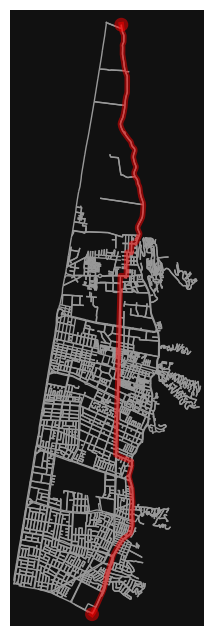

In [54]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=4.709715442360573, Y=24.04262166789496) 
dest = ox.distance.nearest_nodes(G, X=4.7243,Y=-74.0494)

# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)